In [40]:
!python -m pip install --upgrade pip
!python -m pip install pandas matplotlib seaborn

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
df=pd.read_csv("insurance.csv")

In [43]:
df

,Id,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
0,1,39.00,male,23.20,91,Yes,0,No,southeast,1121.87
1,2,24.00,male,30.10,87,No,0,No,southeast,1131.51
2,3,NaN,male,33.30,82,Yes,0,No,southeast,1135.94
3,4,NaN,male,33.70,80,No,0,No,northwest,1136.40
4,5,NaN,male,34.10,100,No,0,No,northwest,1137.01
...,...,...,...,...,...,...,...,...,...,...
1335,1336,44.00,female,35.50,88,Yes,0,Yes,northwest,55135.40
1336,1337,59.00,female,38.10,120,No,1,Yes,northeast,58571.07
1337,1338,30.00,male,34.50,91,Yes,3,Yes,northwest,60021.40
1338,1339,37.00,male,30.40,106,No,0,Yes,southeast,62592.87


In [44]:
df.head()

,Id,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
0,1,39.00,male,23.20,91,Yes,0,No,southeast,1121.87
1,2,24.00,male,30.10,87,No,0,No,southeast,1131.51
2,3,NaN,male,33.30,82,Yes,0,No,southeast,1135.94
3,4,NaN,male,33.70,80,No,0,No,northwest,1136.40
4,5,NaN,male,34.10,100,No,0,No,northwest,1137.01


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1340 non-null   int64  
 1   age            1335 non-null   float64
 2   gender         1340 non-null   object 
 3   bmi            1340 non-null   float64
 4   bloodpressure  1340 non-null   int64  
 5   diabetic       1340 non-null   object 
 6   children       1340 non-null   int64  
 7   smoker         1340 non-null   object 
 8   region         1337 non-null   object 
 9   claim          1340 non-null   float64
dtypes: float64(3), int64(3), object(4)
memory usage: 104.8+ KB


In [46]:
pd.set_option("display.float_format","{:.2f}".format)

In [47]:
sns.set(style="whitegrid",palette="Set2",font_scale=1.1)

In [48]:
df.duplicated().sum()

np.int64(0)

In [49]:
df.isna().sum().sum()

np.int64(8)

In [50]:
df.dropna(inplace=True)

In [51]:
df.shape

(1332, 10)

In [52]:
df.isna().sum().sum()

np.int64(0)

In [53]:
df.describe(include="all")

,Id,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
count,1332.00,1332.00,1332,1332.00,1332.00,1332,1332.00,1332,1332,1332.00
unique,NaN,NaN,2,NaN,NaN,2,NaN,2,4,NaN
top,NaN,NaN,male,NaN,NaN,No,NaN,No,southeast,NaN
freq,NaN,NaN,670,NaN,NaN,695,NaN,1058,442,NaN
mean,674.47,38.09,NaN,30.66,94.19,NaN,1.10,NaN,NaN,13325.25
std,384.70,11.11,NaN,6.12,11.45,NaN,1.21,NaN,NaN,12109.62
min,1.00,18.00,NaN,16.00,80.00,NaN,0.00,NaN,NaN,1121.87
25%,341.75,29.00,NaN,26.20,86.00,NaN,0.00,NaN,NaN,4760.16
50%,674.50,38.00,NaN,30.35,92.00,NaN,1.00,NaN,NaN,9412.97
75%,1007.25,47.00,NaN,34.73,99.00,NaN,2.00,NaN,NaN,16781.33


Text(0.5, 0.98, 'distribution of Numerical Features')

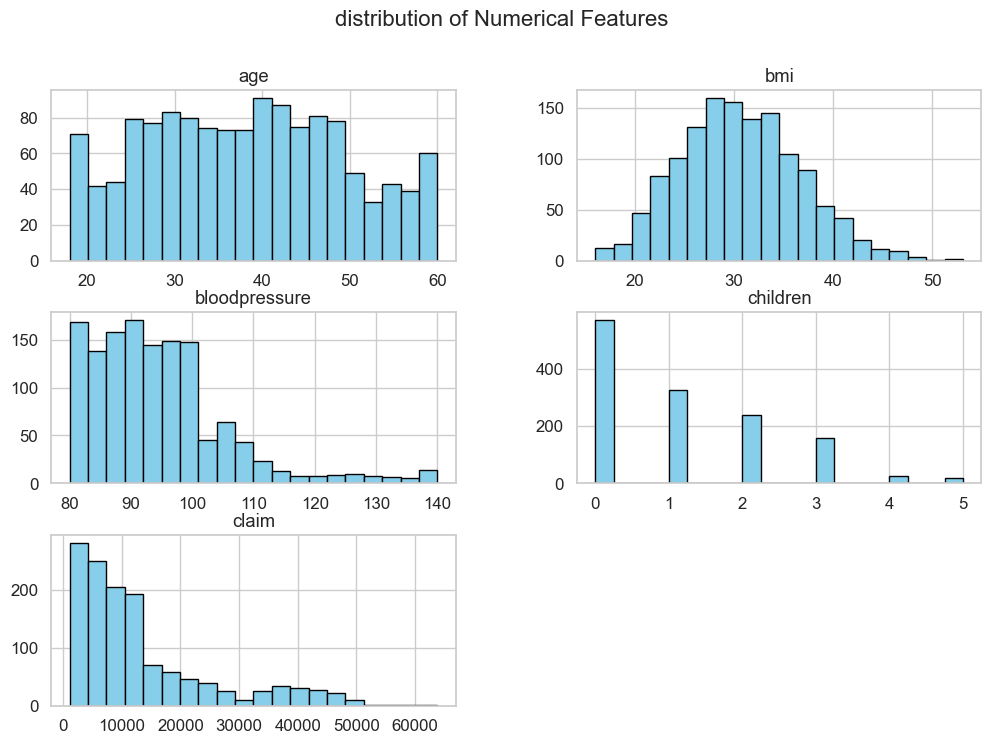

In [54]:
numeric_cols=["age","bmi","bloodpressure","children","claim"]
df[numeric_cols].hist(bins=20,figsize=(12,8),color="skyblue",edgecolor="black")
plt.suptitle("distribution of Numerical Features",fontsize=16)

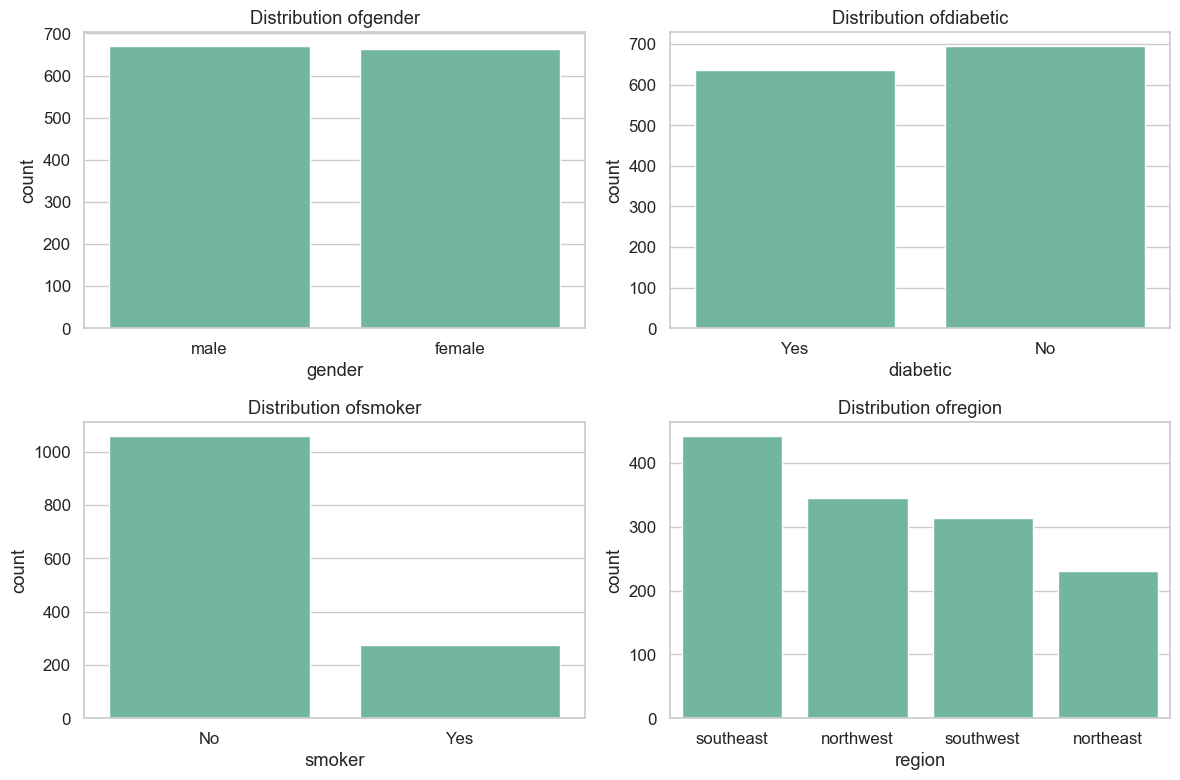

In [55]:
cat_cols=["gender","diabetic","smoker","region"]
plt.figure(figsize=(12,8))
for i , col in enumerate(cat_cols,1):
    plt.subplot(2,2,i)
    sns.countplot(data=df,x=col)
    plt.title(f"Distribution of{col}")
plt.tight_layout()
plt.show()

In [56]:
df.groupby(["gender","smoker"])["claim"].mean().round(2)

gender  smoker
female  No        8762.30
        Yes      30679.00
male    No        8169.25
        Yes      33042.01
Name: claim, dtype: float64

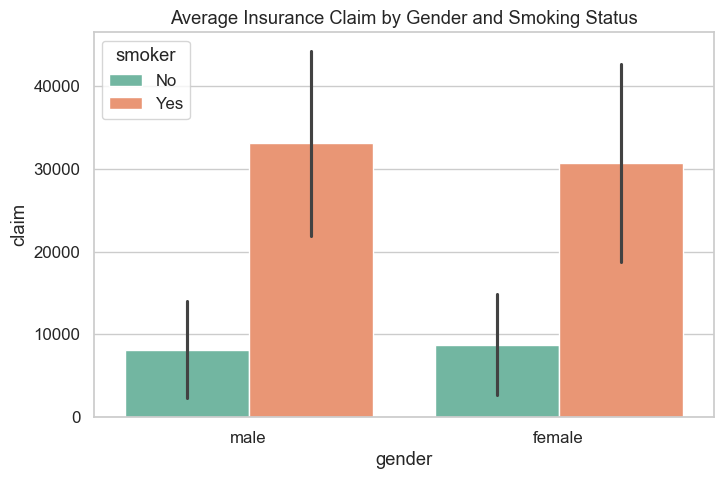

In [57]:
plt.figure(figsize=(8,5))
sns.barplot(data=df,x="gender",y="claim",hue="smoker",estimator="mean",errorbar="sd")
plt.title("Average Insurance Claim by Gender and Smoking Status")
plt.show()

In [58]:
pivot_region_diabetic=df.groupby(["region","diabetic"])["claim"].mean().unstack()

In [59]:
pivot_region_diabetic

diabetic,No,Yes
region,,
northeast,16966.86,16818.30
northwest,11442.83,12224.96
southeast,13578.72,12574.09
southwest,13069.91,12313.74


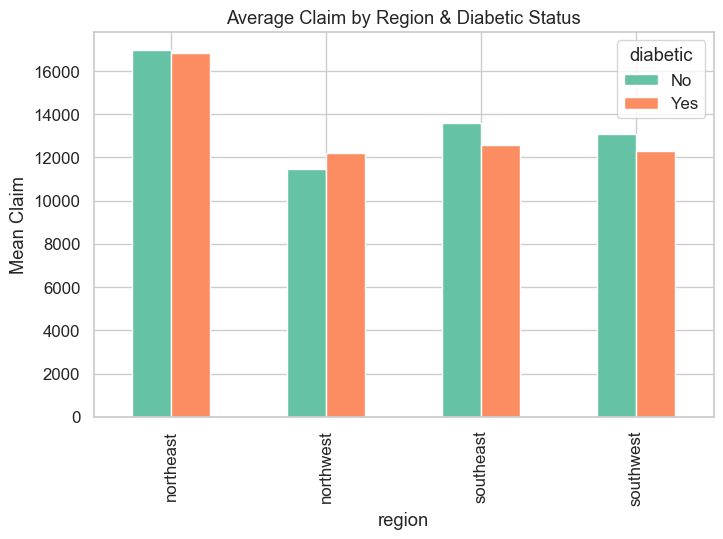

In [60]:
pivot_region_diabetic.plot(kind="bar",figsize=(8,5))
plt.title("Average Claim by Region & Diabetic Status")
plt.ylabel("Mean Claim")
plt.show()

In [61]:
pivot_table=pd.pivot_table(df,values="claim",index="region",columns="smoker",aggfunc="mean")
pivot_table

smoker,No,Yes
region,,
northeast,11666.11,29673.54
northwest,8076.20,30192.00
southeast,7444.14,34845.00
southwest,8294.75,32269.06


In [62]:
pivot_table=pd.pivot_table(df,values="claim",index="children",columns="diabetic",aggfunc="mean")
pivot_table

diabetic,No,Yes
children,,
0,12967.40,11985.29
1,12730.46,12732.06
2,15567.77,14579.36
3,13807.61,17091.26
4,14106.63,13573.35
5,8519.04,9205.59


In [63]:
numeric_cols
df[numeric_cols].corr()

,age,bmi,bloodpressure,children,claim
age,1.00,-0.04,-0.06,-0.03,-0.03
bmi,-0.04,1.00,0.14,0.01,0.20
bloodpressure,-0.06,0.14,1.00,-0.03,0.53
children,-0.03,0.01,-0.03,1.00,0.06
claim,-0.03,0.20,0.53,0.06,1.00


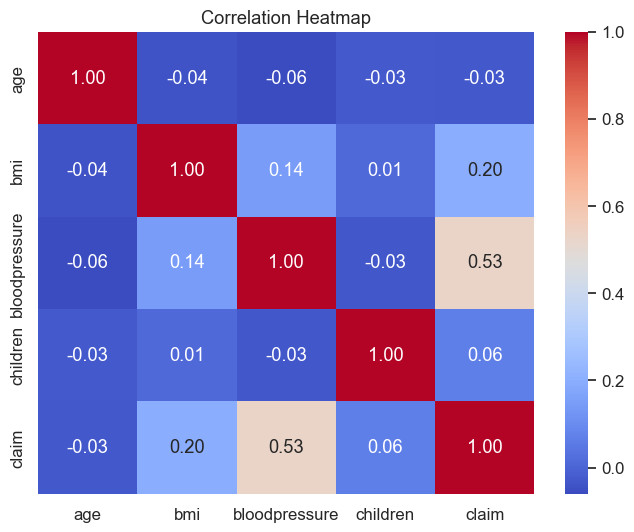

In [64]:
plt.figure(figsize=(8,6))
sns.heatmap(df[numeric_cols].corr(),annot=True,cmap="coolwarm",fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

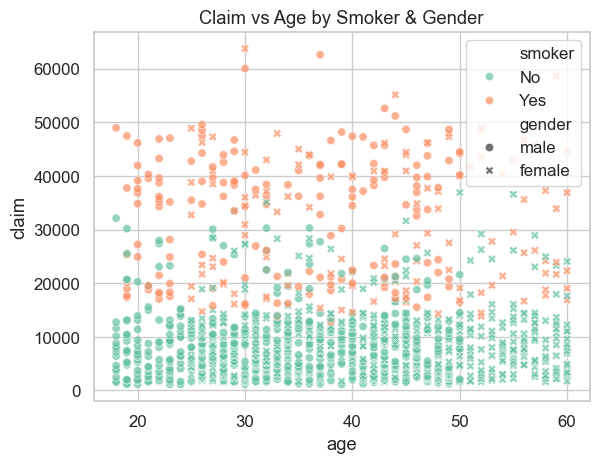

In [66]:
sns.scatterplot(data=df,x="age",y="claim",hue="smoker",style="gender",alpha=0.7)
plt.title("Claim vs Age by Smoker & Gender")
plt.show()

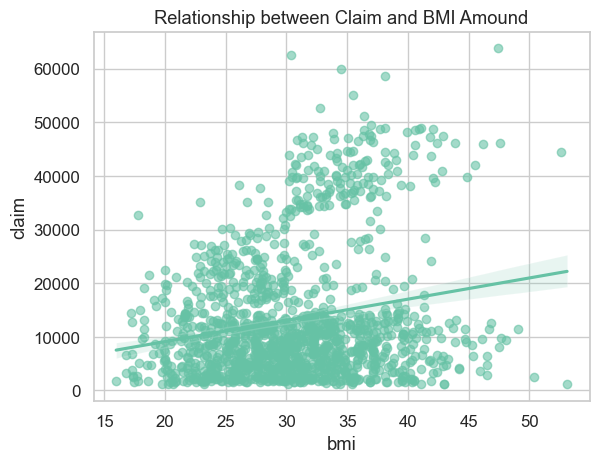

In [69]:
sns.regplot(data=df,x="bmi",y="claim",scatter_kws={"alpha":0.6})
plt.title("Relationship between Claim and BMI Amound")
plt.show()

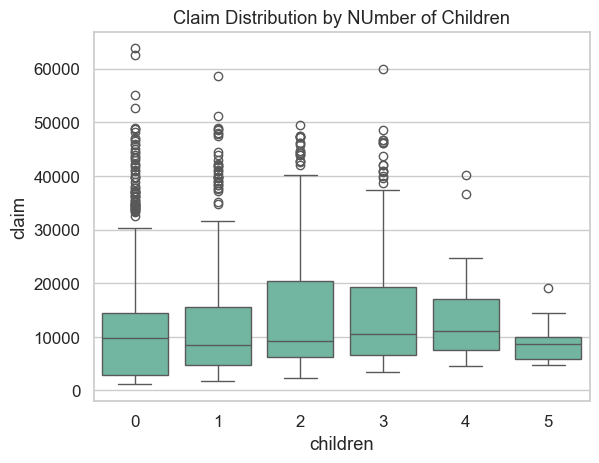

In [73]:
sns.boxplot(data=df,x="children",y="claim")
plt.title("Claim Distribution by NUmber of Children")
plt.show()

In [76]:
df["age_group"] = pd.cut(df["age"], bins=[1, 18, 30, 45, 60, 100], labels=["<18", "18-30", "31-45", "46-60", "60+"])


In [77]:
df

,Id,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim,age_group
0,1,39.00,male,23.20,91,Yes,0,No,southeast,1121.87,31-45
1,2,24.00,male,30.10,87,No,0,No,southeast,1131.51,18-30
7,8,19.00,male,41.10,100,No,0,No,northwest,1146.80,18-30
8,9,20.00,male,43.00,86,No,0,No,northwest,1149.40,18-30
9,10,30.00,male,53.10,97,No,0,No,northwest,1163.46,18-30
...,...,...,...,...,...,...,...,...,...,...,...
1335,1336,44.00,female,35.50,88,Yes,0,Yes,northwest,55135.40,31-45
1336,1337,59.00,female,38.10,120,No,1,Yes,northeast,58571.07,46-60
1337,1338,30.00,male,34.50,91,Yes,3,Yes,northwest,60021.40,18-30
1338,1339,37.00,male,30.40,106,No,0,Yes,southeast,62592.87,31-45


In [78]:
df["age_group"].value_counts()

age_group
31-45    553
46-60    383
18-30    380
<18       16
60+        0
Name: count, dtype: int64

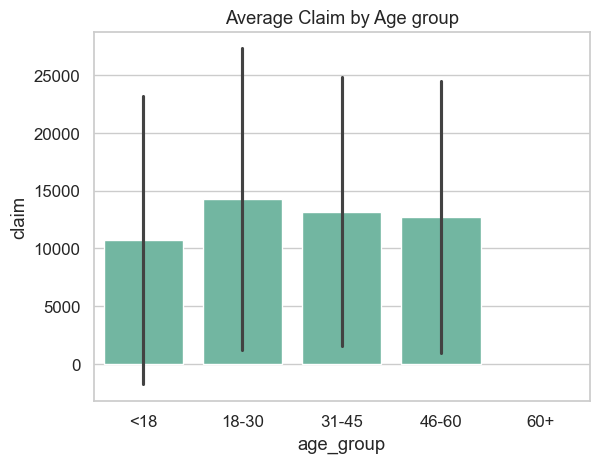

In [79]:
sns.barplot(data=df,x="age_group",y="claim",estimator="mean",errorbar="sd")
plt.title("Average Claim by Age group")
plt.show()

In [80]:
df["bmi_category"]=pd.cut(df["bmi"],bins=[0,18.5,24.9,29.9,100],labels=["unerweight","Normal","Overweight","Obese"])


In [81]:
df["bmi_category"].value_counts()

bmi_category
Obese         702
Overweight    387
Normal        222
unerweight     21
Name: count, dtype: int64

In [ ]:
import warnings
warnings.filterwarnings("ignore")

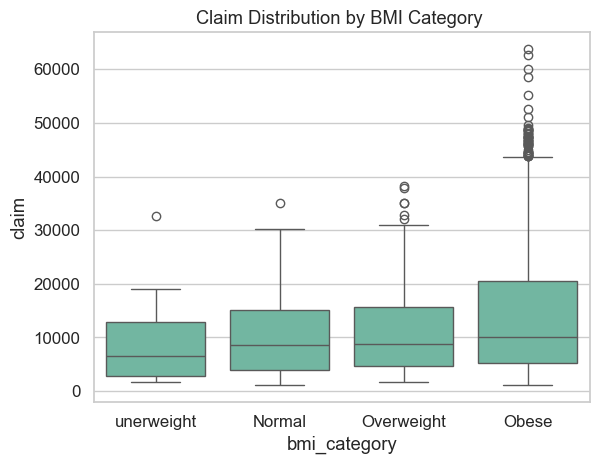

In [84]:
sns.boxplot(data=df,x="bmi_category",y="claim")
plt.title("Claim Distribution by BMI Category ")
plt.show()

In [90]:
region_stats = df.groupby("region").agg(
    smoker_rate=("smoker", lambda x: (x == "Yes").mean() * 100),
    mean_claim=("claim", "mean")
).reset_index()


In [91]:
region_stats

,region,smoker_rate,mean_claim
0,northeast,29.00,16889.04
1,northwest,16.81,11794.22
2,southeast,20.59,13085.50
3,southwest,18.47,12723.13


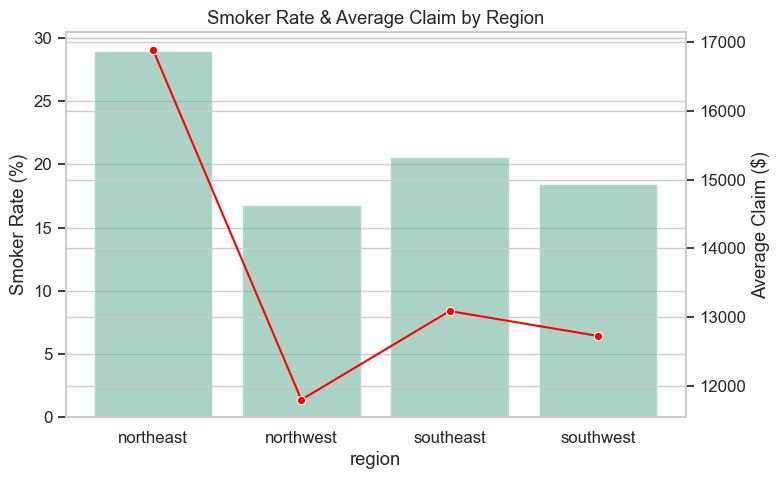

In [95]:
fig, ax1 = plt.subplots(figsize=(8, 5))

# Bar plot for smoker rate
sns.barplot(data=region_stats, x="region", y="smoker_rate", ax=ax1, alpha=0.6)

# Create twin axis for line plot
ax2 = ax1.twinx()
sns.lineplot(data=region_stats, x="region", y="mean_claim", ax=ax2, color="red", marker="o")

# Labels
ax1.set_ylabel("Smoker Rate (%)")
ax2.set_ylabel("Average Claim ($)")
plt.title("Smoker Rate & Average Claim by Region")

plt.show()
